# How many times can we expect the latest drawn card to be the same as the previous card?

Answer: 99% of the games will have at most __nine cards__ that are the same as the previous card. Assuming all 82 cards are drawn. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
values = [-2, -1] + list(range(1, 16)) + [30]
counts = [2, 2] + [5] * 15 + [3]
letters = 'abcdefghijklmnopqrstuvwxyz'.upper()

In [3]:
value_map = dict(zip(values, letters))

In [4]:
count_map = dict(zip(values, counts))
assert sum(count_map.values()) == 82

In [5]:
cards = []

for card, count in zip(value_map.values(), count_map.values()):
    cards += [card] * count
    
assert len(cards) == 82

In [6]:
def count_repeat_cards(cards):
    n_repeated = 0
    prev = None
    for card in cards:
        if prev is None:
            pass
        elif prev == card:
            n_repeated += 1
        prev = card
    return n_repeated

In [7]:
n_shuffles = 1_000_000
n_repeated = {i: 0 for i in range(82)}
uniques = set()
for _ in range(n_shuffles):
    random.shuffle(cards)
    uniques.add(''.join(cards))
    n_repeated[count_repeat_cards(cards)] += 1 

In [8]:
len(uniques), n_shuffles

(1000000, 1000000)

(1.0, 20.0)

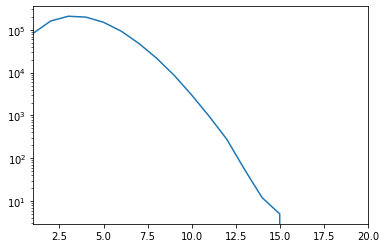

In [9]:
plt.semilogy(n_repeated.values())
plt.xlim([1, 20])

In [10]:
p = {n: val / n_shuffles for n, val in n_repeated.items() if val > 0}

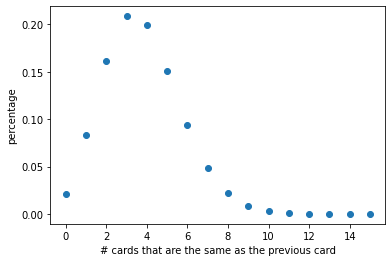

In [11]:
plt.scatter(p.keys(), p.values())
plt.xlabel('# cards that are the same as the previous card')
plt.ylabel('percentage')
plt.savefig('percentage.png')

In [12]:
p

{0: 0.02089,
 1: 0.082702,
 2: 0.161444,
 3: 0.208453,
 4: 0.198927,
 5: 0.15042,
 6: 0.093602,
 7: 0.048475,
 8: 0.022013,
 9: 0.008764,
 10: 0.00301,
 11: 0.000952,
 12: 0.000276,
 13: 5.5e-05,
 14: 1.2e-05,
 15: 5e-06}